<ul class="breadcrumb">
  <li><a href="2.1.Multivariate_Linear_Mixed_Effects_Model.ipynb">Multivariate Basics</a></li>
  <li><a href="2.2.Multivariate_Linear_Additive_Genetic_Model.ipynb">Multivariate Additive Genetic Model</a></li> 
  <li><a href="2.3.Multivariate_Linear_Mixed_Effects_Model_with_Genomic_Data.ipynb">Multivariate Genomic Data</a></li>
</ul>

<div class="span5 alert alert-success">
 <font size="5" face="Georgia">The Multivariate Linear Mixed Effects Model</font> 
</div>

In [1]:
using DataFrames,JWAS,JWAS.Datasets

<button type="button" class="btn btn-lg btn-primary">Data</button> 

In [2]:
phenofile = Datasets.dataset("testMME","data.txt")
data      = readtable(phenofile,separator = ',',header=true)

,sow,site,yr,age,geneticCode,parity,nwn,SYS,bw
1,100-113,113,2005,18,PIC 1,1,8,113_2005_WNTR,9.0
2,100-113,113,2006,18,PIC 1,2,12,113_2006_SPNG,8.0
3,100-5,5,2008,15,PIC 2,1,10,5_2008_ATMN,7.5
4,1000-5,5,2009,17,PIC 2,1,10,5_2009_SPNG,8.3
5,10000-13,13,2004,16,Commercial,1,9,13_2004_WNTR,4.3
6,10000-13,13,2004,18,Commercial,2,10,13_2004_SMMR,2.8
7,10000-13,13,2004,20,Commercial,3,11,13_2004_ATMN,3.9
8,10000-13,13,2005,18,Commercial,4,11,13_2005_SPNG,10.0
9,10000-13,13,2005,25,Commercial,5,7,13_2005_ATMN,4.0
10,10000-6,6,2012,17,PIC C27,1,12,6_2012_ATMN,8.9


<button type="button" class="btn btn-lg btn-primary">Build Model</button> 

#### set up model equations

In [9]:
model_equations    = "nwn = intercept+parity*site+ age
                      bw = intercept+parity*site+ age";

residual_variance = [10.0 2.0
                      2.0 1.0];

In [10]:
model = build_model(model_equations,residual_variance);

#### set variables as covariate (all variables are set as factors by default)

In [11]:
set_covariate(model,"age");

<button type="button" class="btn btn-lg btn-primary">Run Model</button> 

In [12]:
outputMCMCsamples(model,"age");
out=runMCMC(model,data,chain_length=10000,output_samples_frequency=100);

MCMC Information:
methods                        conventional (no markers)
chain_length                                  10000
estimatePi                                    false
constraint                                    false
missing_phenotypes                            false
starting_value                                false
output_samples_frequency                        100
printout_frequency                            10001

Degree of freedom for hyper-parameters:
residual variances:                           4.000
iid random effect variances:                  4.000
polygenic effect variances:                   4.000
marker effect variances:                      4.000



running MCMC for conventional (no markers)...100%|██████| Time: 0:00:02


<button type="button" class="btn btn-lg btn-primary">Check Results</button> 

In [13]:
keys(out)

Base.KeyIterator for a Dict{Any,Any} with 5 entries. Keys:
  "Posterior mean of residual covariance matrix"
  "MCMC samples for: 1:age"
  "MCMC samples for: 2:age"
  "MCMC samples for residual covariance matrix"
  "Posterior mean of location parameters"

In [14]:
out["Posterior mean of location parameters"]

22x2 Array{Any,2}:
 "1:intercept : intercept"   16.2861  
 "1:parity*site : 1 * 113"  -21.4     
 "1:parity*site : 2 * 113"  -17.3969  
 "1:parity*site : 1 * 5"    -17.8752  
 "1:parity*site : 1 * 13"   -18.8202  
 "1:parity*site : 2 * 13"   -19.3936  
 "1:parity*site : 3 * 13"   -19.6934  
 "1:parity*site : 4 * 13"   -18.3825  
 "1:parity*site : 5 * 13"   -27.3456  
 "1:parity*site : 1 * 6"    -16.5704  
 "1:age : age"                0.7229  
 "2:intercept : intercept"    4.74538 
 "2:parity*site : 1 * 113"   -2.5794  
 "2:parity*site : 2 * 113"   -3.58803 
 "2:parity*site : 1 * 5"     -2.90829 
 "2:parity*site : 1 * 13"    -6.49124 
 "2:parity*site : 2 * 13"    -8.8013  
 "2:parity*site : 3 * 13"    -8.39953 
 "2:parity*site : 4 * 13"    -1.60111 
 "2:parity*site : 5 * 13"   -10.2217  
 "2:parity*site : 1 * 6"     -2.2948  
 "2:age : age"                0.378996

In [17]:
outsample=out["MCMC samples for: 2:age"]

1x101 Array{Any,2}:
 "2:age : age"  0.201385  0.312227  …  0.0772481  0.172825  0.116788


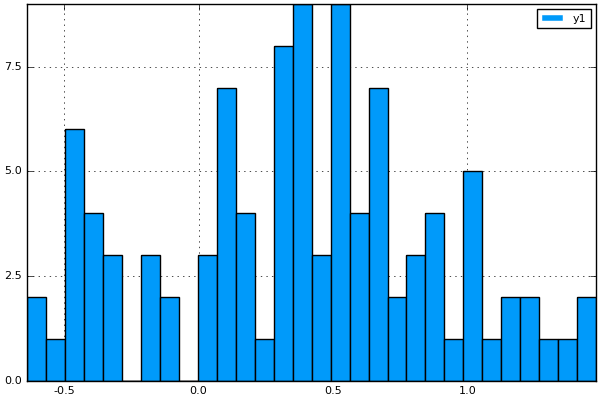

In [18]:
using Plots
histogram(outsample[2:end])